<a href="https://colab.research.google.com/github/rituparna50/AstrophysicsLibraries/blob/main/solardata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                      #numpy is the library for scientific computing
from matplotlib import pyplot as plt    #Similar to the numpy import, the as plt part provides a
#convenient shorthand (plt) to reference the pyplot module when you use its functions later in your code.

In [ ]:
!pip install astropy
!pip install sunpy
!pip install drms
!pip install zeep


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
from sunpy.net import Fido, attrs as a
print(Fido)

sunpy.net.Fido

Fido is a unified data search and retrieval tool.

It provides simultaneous access to a variety of online data sources, some
cover multiple instruments and data products like the Virtual Solar
Observatory and some are specific to a single source.

For details of using `~sunpy.net.Fido` see :ref:`sunpy-tutorial-acquiring-data-index`.


      Client      ...
----------------- ...
CDAWEBClient      ...
EVEClient         ...
GBMClient         ...
XRSClient         ...
SUVIClient        ...
GONGClient        ...
LYRAClient        ...
NOAAIndicesClient ...
NOAAPredictClient ...
SRSClient         ...
NoRHClient        ...
RHESSIClient      ...
HEKClient         ...
HECClient         ...
JSOCClient        ...
VSOClient         ...


**Requesting AIA images from the JSOC database**

In [ ]:
import os
import astropy.units as u


In [ ]:
import sunpy.coordinates
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

In [ ]:
port astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch

We need to crop for the active region we want to showcase

In [ ]:
start_time = Time('2012-09-24T14:56:03', scale='utc', format='isot')
bottom_left = SkyCoord(-500*u.arcsec, -275*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right = SkyCoord(150*u.arcsec, 375*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
## Now constructing the cutout from the coordinates above using sunpy.net.jsoc.attrs.Cutout attribute

cutout = a.jsoc.Cutout(bottom_left, top_right=top_right, tracking=True)

In [ ]:
import os

#Set the environment variable
os.environ["JSOC_EMAIL"] = "rituparna50@gmail.com"

In [ ]:
jsoc_email = os.environ["JSOC_EMAIL"]

In [ ]:
# We are constructing the query, instead of downloading the data.
#We will download images from a 12-hour interval centeres on the time abobve cutout/
# We request one image every 2 hours/

query = Fido.search(
    a.Time(start_time - 6*u.h, start_time + 6*u.h),
    a.Wavelength(171*u.angstrom),
    a.Sample(2*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    cutout,
)
print(query)

Results from 1 Provider:

7 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2012-09-24T08:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T10:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T12:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T14:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T16:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T18:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T20:56:01Z  SDO/AIA    AIA_3      171    2128




In [ ]:
## Submit the export request and download the data

files = Fido.fetch(query)
files.sort()


Export request pending. [id=JSOC_20230807_3488, status=2]
Waiting for 0 seconds...
7 URLs found for download. Full request totalling 7MB


Files Downloaded:   0%|          | 0/7 [00:00<?, ?file/s]

aia.lev1_euv_12s.2012-09-24T085601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T105601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T125601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T145601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T165601Z.171.image.fits:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T185601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T205601Z.171.image.fits:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

In [ ]:
## Now that we have downloaded the files, we can create the sunpy.map.mapsequence from them and animate them
sequence = sunpy.map.Map(files, sequence=True)

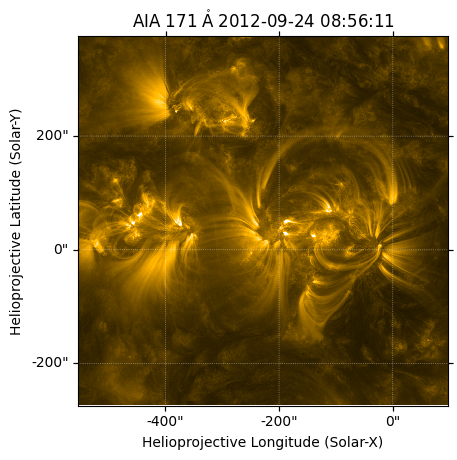

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=sequence.maps[0])
ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))

plt.show()

The terms "solar X" and "solar Y" are not standard terminology for describing helioprojective coordinates. Instead helioprojective coordinates are typically denoted as helioprojective longitude and helioprojective latitude. and they represent a projection of solar features onto a plane as observed from earth.

Helioprojective Longitude (Carrington Longitude)
Represents the east-west position of a point on the solar surface as observed from Earth.
This angle is measured in degrees eastward from the central meridian (a reference line passing through the solar disk's center).
** If horizon runs east-west, central meridian runs north south. Thsu the positions of zenith and nadir are on the meridian.

-- The Carrington rotation is a standard reference frame used to measure solar rotation and activity
-In graphical representation, the helioproejctive longitude is usually depicted along the horizontal axis, similar to how geographical longitude is often shown along the equator on a map.

---Helioprojective Latitude
-Represents north-south position of a point on the solar surface as observed from Earth.
This angle is measured in degrees above or below the solar equator
Helioprojective latitude is usually depicted along the vertical axis, similar to how geographical latitidue is shown aling meridians on a map.


# Fido Metadata Queries

This example shows how to search and retrieve metadata using `~sunpy.net.Fido`.
Fido supports searching metadata from services like `~sunpy.net.hek.HEKClient`,
`~sunpy.net.helio.HECClient`, and `~sunpy.net.jsoc.JSOCClient`.


In this example we will make one search for records from the JSOC and the HEK,
and then download the corresponding file from the JSOC.


In [ ]:
import os

from sunpy.net import Fido
from sunpy.net import attrs as a

We will query the HEK for all flares with a peak flux greater than 1000.
We will also search JSOC for a hmi.m_45s series




In [ ]:
timerange = a.Time('2010/8/1 03:40', '2010/8/1 3:40:10')

In [ ]:
results = Fido.search(timerange,a.hek.FL & (a.hek.FL.PeakFlux >1000)  |  a.jsoc.Series('hmi.m_45s') & a.jsoc.Notify(jsoc_email))

In [ ]:
print(results)

Results from 2 Providers:

2 Results from the HEKClient:

                                                                                                                     gs_thumburl                                                                                                                       ...
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ ...
http://sdowww.lmsal.com/sdomedia/ssw/ssw_client/data/ssw_service_100731_205448_25495028/www/EDS_FlareDetective-TriggerModule_20100801T033001-20100801T035225_AIA_171_S21W87_ssw_cutout_20100801_033013_AIA_171_S21W87_20100801_033012_context_0180.gif ...
http://sdowww.lmsal.com/sdomedia/ssw/ssw_client/data/ssw_service_100801_234037_25860951/www/EDS_FlareDetective-TriggerModule_20100801T033008-20100801T035232_AIA_193_S21W87_ssw_cutout_201008

In [ ]:
#Now we will download the searched records. Since the HEK client dont provide files, "FIDO.fetch" will
#ignore it and downlaod files from JSOC

files = Fido.fetch(results)
print(files)

Export request pending. [id=JSOC_20230808_273, status=2]
Waiting for 0 seconds...
1 URLs found for download. Full request totalling 14MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['/root/sunpy/data/hmi.m_45s.20100801_034030_TAI.2.magnetogram.fits']


In [ ]:
# Now we will extract individual responses from Fido results.

hek_results, jsoc_results =results['hek'], results['jsoc']

In [ ]:
# The results from a metadata search could have up to 100 columns
#So, we can use 'show() to speciffy the column names you want to display

hek_table = hek_results.show()
print(hek_table)

                                                                                                                     gs_thumburl                                                                                                                       ...
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ ...
http://sdowww.lmsal.com/sdomedia/ssw/ssw_client/data/ssw_service_100731_205448_25495028/www/EDS_FlareDetective-TriggerModule_20100801T033001-20100801T035225_AIA_171_S21W87_ssw_cutout_20100801_033013_AIA_171_S21W87_20100801_033012_context_0180.gif ...
http://sdowww.lmsal.com/sdomedia/ssw/ssw_client/data/ssw_service_100801_234037_25860951/www/EDS_FlareDetective-TriggerModule_20100801T033008-20100801T035232_AIA_193_S21W87_ssw_cutout_20100801_033020_AIA_193_S21W87_20100801_033019_context_0180.gif 

The two links show images from 171 A and 193 A botjh from AIA

In [ ]:
hek_table = hek_results.show('event_peaktime', 'obs_instrument', 'fl_peakflux')
print(hek_table)

     event_peaktime     obs_instrument fl_peakflux
----------------------- -------------- -----------
2010-08-01 03:40:37.000            AIA     1027.64
2010-08-01 03:40:44.000            AIA     1441.78


The results from JSOC have a default set of columns to show

In [ ]:
print(jsoc_results)
jsoc_table = jsoc_results.show()
print(jsoc_table)

         T_REC          TELESCOP  INSTRUME  WAVELNTH CAR_ROT
----------------------- -------- ---------- -------- -------
2010.08.01_03:40:30_TAI  SDO/HMI HMI_FRONT2   6173.0    2099
        DATE                DATE__OBS        ... CALVER64
-------------------- ----------------------- ... --------
2012-09-05T07:57:40Z 2010-08-01T03:39:41.00Z ...       16


# **COMPUTER VISION TECHNIQUES**

COmputer vision is a multi-disciplinary field of artificial interlligence and computer science that focuses on enabling computers to interpret, understand and process visual information from the world, similar to the way humans do. It involves developing algorithms, techniques, and technologies that allow computers to gain a high level understanfding of images nad videos. COmputer vision aims to replicate  the human visual perception system using machines. It enables computers to analyze and make sense of visual data such as images and videos and extract meansigful information from them.

FOllowing are code fragments to help understand how computer vision techniques can be used for  analyzing solar data

Finding and masking bright pixels.

How to find and overplot the location of the brightest pixel and then mask pixels around that region./



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma

import astropy.units as u
import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE
from sunpy.map.maputils import all_coordinates_from_map



Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

AIA20110607_063302_0171_lowres.fits:   0%|          | 0.00/973k [00:00<?, ?B/s]

In [ ]:
#Starting wirth sample data

aia = sunpy.map.Map(AIA_171_IMAGE)

#To find the brightest pixel, we find the maximum in the AIA image data
#then transform that pixel coordinate to a map coordinate

pixel_pos = np.argwhere(aia.data == aia.data.max()) * u.pixel
hpc_max = aia.wcs.pixel_to_world(pixel_pos[:,1], pixel_pos[:,0])

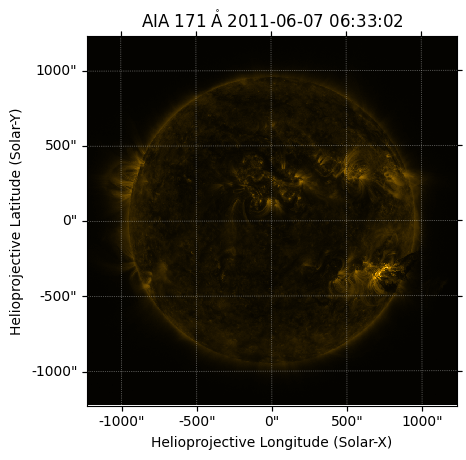

In [ ]:
#Plotting the results

fig = plt.figure()
ax = fig.add_subplot(projection=aia)
aia.plot(axes=ax)
ax.plot_coord(hpc_max)
plt.show()

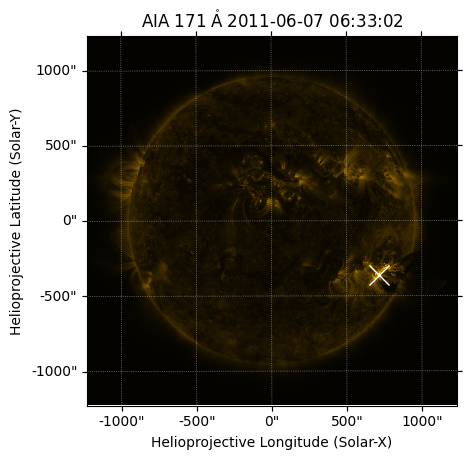

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia)
aia.plot(axes=ax)
ax.plot_coord(hpc_max, color='white', marker='x', markersize=15)
plt.show()

In [ ]:
# A utility function gives us access to the helioprojective coordinate of each
# pixels. We create a new array which contains the normalized radial position
# for each pixel adjusted for the position of the brightest pixel
# (using ``hpc_max``) and then create a new map.

hpc_coords = all_coordinates_from_map(aia)
r_mask = np.sqrt((hpc_coords.Tx - hpc_max.Tx) ** 2 +
                 (hpc_coords.Ty - hpc_max.Ty) ** 2) / aia.rsun_obs
mask = ma.masked_less_equal(r_mask, 0.1)
scaled_map = sunpy.map.Map(aia.data, aia.meta, mask=mask.mask)

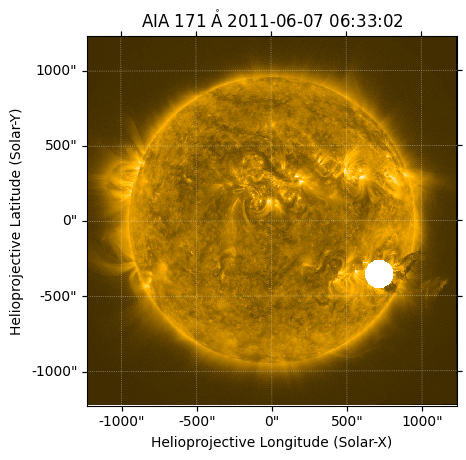

In [ ]:
# Let's plot the results.

fig = plt.figure()
ax = fig.add_subplot(projection=scaled_map)
scaled_map.plot(axes=ax)
plt.show()

# **Plotting **
Examples of visualizing supported data types

Overlaying two maps to draw contours of one map on top of another to compare features

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.data.sample
from sunpy.map import Map


HMI shows the line-of-sight magnetic field at the photosphere while AIA 171 images show the resulting magnetic fields filled with hot plasma above, in the corona.
To evaluate what coronalfeatures overlap with regions of strong line-of-sight magnetic fields

In [ ]:
aia_map = Map(sunpy.data.sample.AIA_171_IMAGE)
hmi_map = Map(sunpy.data.sample.HMI_LOS_IMAGE)

In [ ]:
bottom_left = [-100, -120] * u.arcsec
top_right = [800, 800] * u.arcsec
aia_smap = aia_map.submap(SkyCoord(*bottom_left,frame=aia_map.coordinate_frame),top_right=SkyCoord(*top_right,frame=aia_map.coordinate_frame))
hmi_smap = hmi_map.submap(SkyCoord(*bottom_left,frame=hmi_map.coordinate_frame),top_right=SkyCoord(*top_right,frame=hmi_map.coordinate_frame))

In the provided code fragment, a submap is being created from an existing solar image data using the SunPy library. The code involves creating a smaller region of interest (ROI) within the original image data, focusing on a specific area. Let's break down what each part of the code is doing:

    aia_smap = aia_map.submap(...):
    This line of code is creating a new submap from an existing solar image map represented by the variable aia_map. The submap will contain a smaller area of interest defined by specific coordinates.

    SkyCoord(*bottom_left, frame=aia_map.coordinate_frame):
    Here, bottom_left is a tuple containing the coordinates of the bottom-left corner of the desired submap region. This corner defines the lower bounds of the region. frame=aia_map.coordinate_frame specifies that the coordinates are provided in the same coordinate frame as the original image (aia_map).

    top_right=SkyCoord(*top_right, frame=aia_map.coordinate_frame):
    Similarly, top_right is a tuple containing the coordinates of the top-right corner of the desired submap region. This corner defines the upper bounds of the region. Again, frame=aia_map.coordinate_frame indicates that the coordinates are provided in the same coordinate frame as the original image.

       The top-right corner coordinates of the region of interest (top_right).

       The bottom-left corner coordinates of the region of interest (bottom_left).

  Overall, the code is using the submap() method provided by the SunPy library to create a new submap from the original image data. The submap() method requires two main pieces of information:

The code effectively specifies a rectangular region of interest within the original solar image by defining the coordinates of its bottom-left and top-right corners. The resulting aia_smap is a new submap that contains only the selected region from the original aia_map.

Note that this code assumes that aia_map is a pre-loaded solar image map object using the SunPy library. It's also important to ensure that the coordinate frame of the original image and the provided coordinates match correctly for accurate res

In [ ]:
levels = [-1000, -500, -250, 250, 500, 1000] *u.G
# The variab;e "levels" is being assigned to a list of numerical values which represent levels for visualizing a certin type of data.
#The values in the list are associated with magentic fiedl strengths or values.
#The u.G means valus are expresses in units of Gauss (G) which is a unit of magnetic field strength

Purpose of defining these levels is to provide thresholds for data visualization. These levels might be used to create a color map or contour plot to visualize variations in ,agneitc field strength across a solar image or map.
Negative and positive values in the list suggest that both the direction and magnitude of the magnetic fiels are being considered. By specifying these levels, you can create visualizations that highlight different ranges of magnetic field strengths, helping to reveal patterns and features in the solar data.

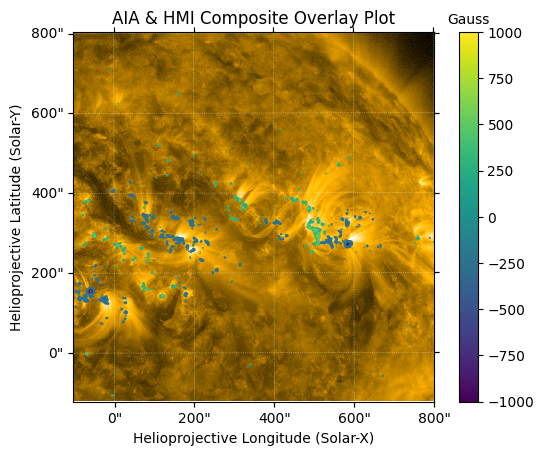

In [ ]:
fig = plt.figure()  #Creating a figure. A new Matplotlib figure ('fig') is created and
ax = fig.add_subplot(projection=aia_smap) # axes with a specified projection (projection=aia_smap) is added to the figure. The aia_smap submap from the previous code is used as the projection

aia_smap.plot(axes=ax) #Plotting AIA image. This line plots the submap aia_smap onto the axes ax.
                      #This is the image data captured by the AIA instrument, showing coronal structures.

#Drawing contours from HMI data
hmi_smap.draw_contours(axes=ax, levels=levels, cmap="viridis") #This code draws contours on the plot using the hmi_smap submap data from the previous code. The levels list defines the
              #magnetic field strength levels for contour lines, and the cmap parameter sets the color map for the contours.

#Adding colorbar
norm = matplotlib.colors.Normalize(vmin=-1000, vmax=1000)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap="viridis"), ax=ax)
cbar.ax.set_title("Gauss", fontsize=10)

#This code adds a colorbar to the plot to indicate the color mapping used for the contours. The colorbar range (vmin to vmax)
#corresponds to the range of magnetic field values. The color map used is "viridis."

ax.set_title("AIA & HMI Composite Overlay Plot")
plt.show()

This plot is a composite overlay plot that combines information from both the AIA and HMI instruments to visualize coronal structures in relation to the line of sight magnetic field on the Sun. The purpose of this code is to create a single plot that combines visualizations of coronal structures from the AIA image and contours representing the line-of-sight magnetic field from the HMI data. This type of visualization can provide insights into the relationship b/w solar magentic fields and the appearance of coronal features.